In [3]:
%matplotlib inline
%matplotlib inline
import sys
sys.path.append('libraries')
from pathlib import Path
import numpy as np, scipy, matplotlib.pyplot as plt, sklearn, urllib, IPython.display as ipd
import librosa, librosa.display
import tfm_lib
import stanford_mir; stanford_mir.init()
import seaborn
plt.rcParams['figure.figsize'] = (18, 5)

In [4]:
x, sr = librosa.load('../audios/ballenas.wav', duration=180)

In [5]:
ipd.Audio(x, rate=sr)

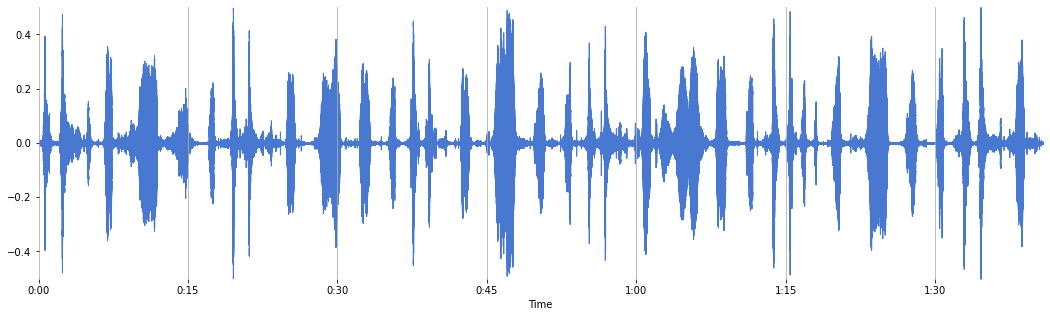

In [6]:
plt.rcParams['figure.figsize'] = (18, 5)
librosa.display.waveplot(x, sr=sr)
plt.grid(axis='y')

In [7]:
hop_length = 256
frame_length = 512

In [8]:
rmse, centroide, zeros, bandwidth, flatness, rolloff = tfm_lib.extract_features(x, sr, hop_length, frame_length)

In [9]:
features = {'rmse': rmse, 'centroide': centroide, 'zeros': zeros, 'bandwidth': bandwidth, 
            'flatness': flatness, 'rolloff': rolloff}

In [10]:
type(features['rmse']), type(features['bandwidth']), len(features['zeros']), len(features['flatness']) 

(numpy.ndarray, numpy.ndarray, 8684, 8684)

In [11]:
frames = range(len(features['rmse']))
t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)

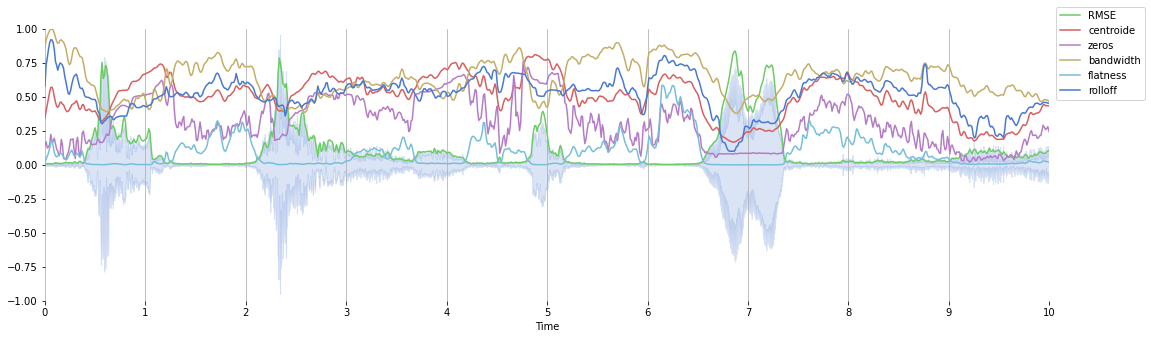

In [15]:
plt.rcParams['figure.figsize'] = (18, 5)
librosa.display.waveplot(x/x.max(), sr=sr, alpha=0.2)
plt.plot(t, rmse/rmse.max())
plt.plot(t, centroide/centroide.max())
plt.plot(t, zeros/zeros.max())
plt.plot(t, bandwidth/bandwidth.max())
plt.plot(t, flatness/flatness.max())
plt.plot(t, rolloff/rolloff.max())
plt.xlim(0, 10)
plt.grid(axis='y')
plt.legend(('RMSE', 'centroide', 'zeros', 'bandwidth', 'flatness', 'rolloff'), bbox_to_anchor=(1.1, 1.1))
plt.show()

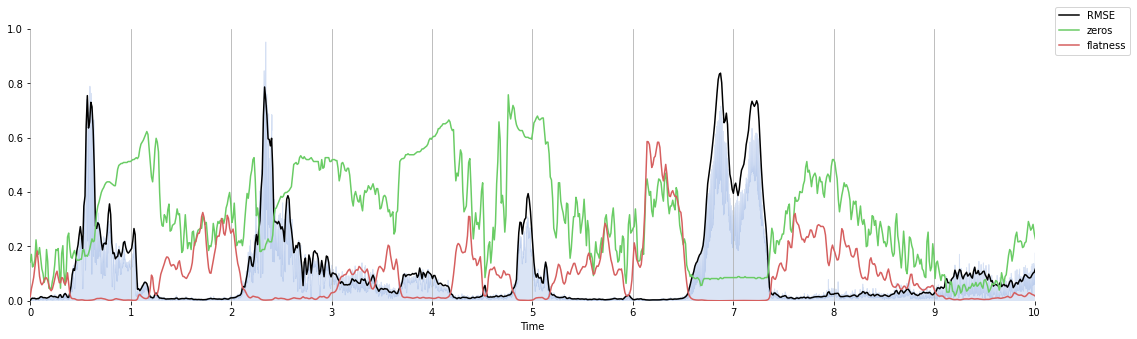

In [16]:
plt.rcParams['figure.figsize'] = (18, 5)
librosa.display.waveplot(x/x.max(), sr=sr, alpha = 0.2)
plt.plot(t, rmse/rmse.max(), color='k')
plt.plot(t, zeros/zeros.max())
plt.plot(t, flatness/flatness.max())
plt.xlim(0, 10)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.legend(('RMSE', 'zeros', 'flatness'), bbox_to_anchor=(1.1, 1.1))
plt.show()

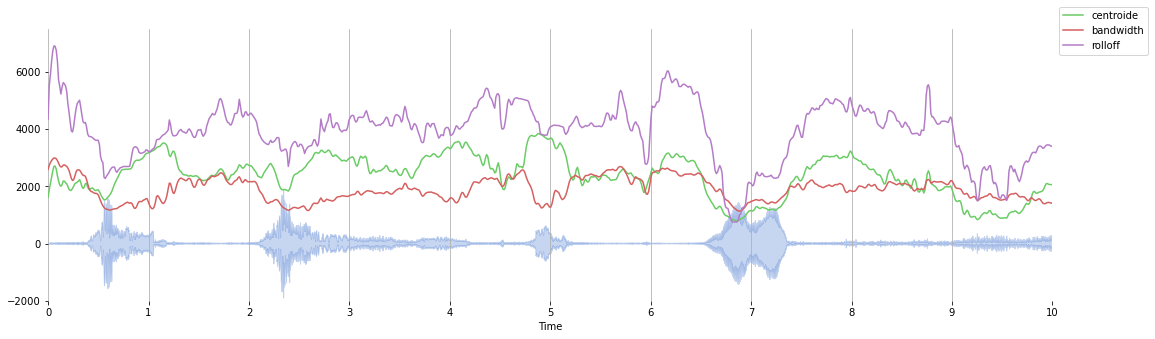

In [18]:
plt.rcParams['figure.figsize'] = (18, 5)
librosa.display.waveplot(x/x.max()*2000, sr=sr, alpha=0.3)
plt.plot(t, centroide)
plt.plot(t, bandwidth)
plt.plot(t, rolloff)
plt.xlim(0, 10)
plt.grid(axis='y')
plt.legend(('centroide', 'bandwidth', 'rolloff'), bbox_to_anchor=(1.1, 1.1))
plt.show()

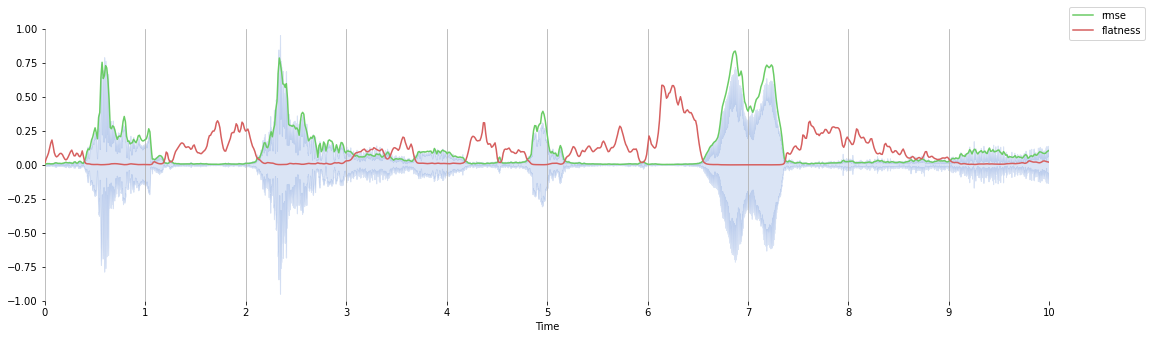

In [19]:
plt.rcParams['figure.figsize'] = (18, 5)
librosa.display.waveplot(x/x.max(), sr=sr, alpha = 0.2)
plt.plot(t, rmse/rmse.max())
plt.plot(t, flatness/flatness.max())
plt.xlim(0, 10)
plt.grid(axis='y')
plt.legend(('rmse', 'flatness'), bbox_to_anchor=(1.1, 1.1))

In [20]:
rmse_lim = rmse/rmse.max()
flatness_lim = flatness/flatness.max()
limite_rmse1 = 0.02
limite_rmse = 0.01
limite_flat = 0.015
vector = np.array([])
for i, (r, f) in enumerate(zip(rmse_lim, flatness_lim)):
    if r > limite_rmse1:
        vector = np.append(vector, 1)
    else:
        if r < limite_rmse:
            if f > limite_flat:
                vector = np.append(vector, 0)
            else:
                vector = np.append(vector, 1)
        else:
            vector = np.append(vector, 1)


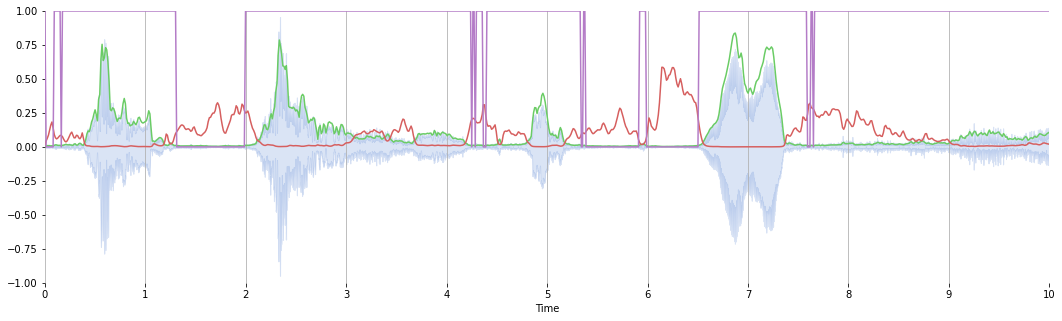

In [21]:
plt.rcParams['figure.figsize'] = (18, 5)
librosa.display.waveplot(x/x.max(), sr=sr, alpha = 0.2)
plt.plot(t, rmse/rmse.max())
plt.plot(t, flatness/flatness.max())
plt.plot(t, vector)
plt.xlim(0, 10)
plt.grid(axis='y')

In [22]:
vector

array([1., 0., 0., ..., 0., 0., 0.])

In [23]:
cortes = []
for v in vector:
    n = 0
    while n < hop_length:
        cortes.append(v)
        n +=1
ceros = np.zeros(abs(len(cortes) - len(x)))
if len(cortes) > len(x):
    x = np.append(x, ceros)
if len(cortes) < len(x):
    cortes = np.append(cortes, ceros)
y = cortes * x
cortes3 = []
cortes_final = []
for n in y:
    if n != 0:
        cortes3.append(n)
    else:
        cortes_final.append(cortes3)
        cortes3 = []
cortes_array = []
for n in cortes_final:
    if len(n) > sr/2:
        cortes_array.append(np.array(n))

In [24]:
len(cortes_array)

39

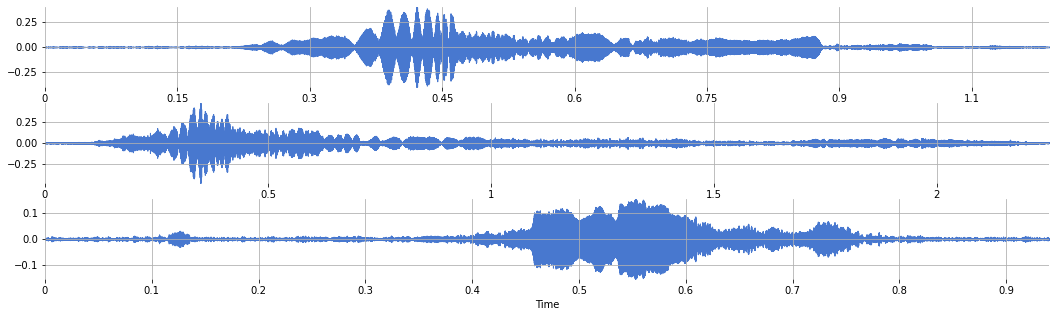

In [25]:
plt.subplot(3,1,1)
librosa.display.waveplot(cortes_array[0], sr)
plt.subplot(3,1,2)
librosa.display.waveplot(cortes_array[1], sr)
plt.subplot(3,1,3)
librosa.display.waveplot(cortes_array[2], sr)

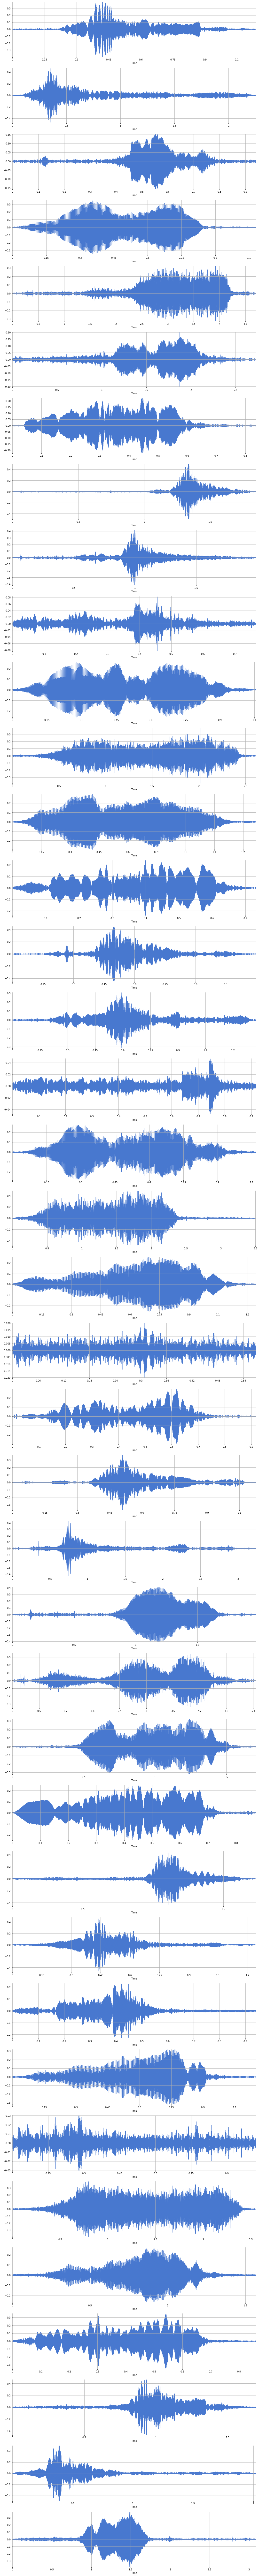

In [26]:
sonidos = len(cortes_array)
plt.rcParams['figure.figsize'] = (18, sonidos*5)
for i, audio in enumerate(cortes_array[:sonidos]):
    plt.subplot(sonidos, 1, i+1)
    librosa.display.waveplot(audio, sr)

In [27]:
ipd.Audio(cortes_array[0], rate=sr)

In [41]:
'''plt.rcParams['figure.figsize'] = (18, 5)
librosa.display.waveplot(x/x.max(), sr=sr, alpha = 0.2)
plt.plot(audio)
plt.xlim(0, 10)
plt.grid(axis='y')'''

"plt.rcParams['figure.figsize'] = (18, 5)\nlibrosa.display.waveplot(x/x.max(), sr=sr, alpha = 0.2)\nplt.plot(audio)\nplt.xlim(0, 10)\nplt.grid(axis='y')"

In [40]:
#Función para marcar audio de ballena en pista
def marca_audio(rmse, flatness):
    import numpy as np
    import stanford_mir; stanford_mir.init()
    rmse_lim = rmse/rmse.max()
    flatness_lim = flatness/flatness.max()
    limite_rmse = 0.02
    limite_flat = 0.01
    vector = np.array([])
    for i, (r, f) in enumerate(zip(rmse_lim, flatness_lim)):
        if r < limite_rmse:
            if f > limite_flat:
                vector = np.append(vector, 0)
            else:
                vector = np.append(vector, 1)
        else:
            vector = np.append(vector, 1)
    return(vector)

#Segmentación con RMSE y flatnes
rmse_lim = rmse/rmse.max()
flatness_lim = flatness/flatness.max()
limite_rmse1 = 0.02
limite_rmse = 0.01
limite_flat = 0.015
vector = np.array([])
for i, (r, f) in enumerate(zip(rmse_lim, flatness_lim)):
    if r > limite_rmse1:
        vector = np.append(vector, 1)
    else:
        if r < limite_rmse:
            if f > limite_flat:
                vector = np.append(vector, 0)
            else:
                vector = np.append(vector, 1)
        else:
            vector = np.append(vector, 1)

#Función de corte de audios
def corta_audio(marcas, x, sr, hop_length):
    import numpy as np
    cortes = []
    for v in marcas:
        n = 0
        while n < hop_length:
            cortes.append(v)
            n +=1
    ceros = np.zeros(abs(len(cortes) - len(x)))
    if len(cortes) > len(x):
        x = np.append(x, ceros)
    if len(cortes) < len(x):
        cortes = np.append(cortes, ceros)
    y = cortes * x
    cortes3 = []
    cortes_final = []
    for n in y:
        if n != 0:
            cortes3.append(n)
        else:
            cortes_final.append(cortes3)
            cortes3 = []
    cortes_array = []
    for n in cortes_final:
        if len(n) > sr/2:
            cortes_array.append(np.array(n))
    return(cortes_array)


In [43]:
corta_audio(vector, x, sr, hop_length)

[array([-0.00583471, -0.0056655 , -0.00530316, ...,  0.00368061,
         0.00091396, -0.00445656]),
 array([-4.93377214e-03, -4.53130621e-03, -1.09511777e-04, ...,
        -2.50227936e-03, -1.22898509e-05,  3.05844471e-03]),
 array([ 0.00209181,  0.00238163,  0.0033807 , ..., -0.00148049,
        -0.0006393 , -0.0015367 ]),
 array([-0.00317515, -0.00242406, -0.00178909, ..., -0.00294401,
        -0.00156763,  0.00116012]),
 array([-0.00080584, -0.00102271, -0.00233422, ..., -0.00239516,
        -0.0014815 , -0.00042371]),
 array([-2.83620250e-03, -2.06904463e-03, -1.01370670e-05, ...,
        -8.35258921e-04, -3.53580428e-04, -4.45668673e-04]),
 array([-0.0031526 , -0.00124117,  0.00112876, ..., -0.00012091,
         0.00075227,  0.00116856]),
 array([0.01151981, 0.01127353, 0.00917031, ..., 0.00187776, 0.00196953,
        0.00075726]),
 array([-4.18802164e-03, -5.86759858e-03, -5.58201829e-03, ...,
        -2.13407725e-03, -3.29566174e-05,  5.12019833e-05]),
 array([-0.00063904,  0.0